##Code for 3D plots


In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')

def list_ticks(x):
    x_tk=[]
    for i in x:
        if i%1.==0.:
            x_tk.append(str(int(i)))
        else:
            x_tk.append(str(i))
            
    return x_tk

Zw = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.004, 0.006, 0.008, 0.010, 0.014, 0.017, 0.020, 0.030, 0.040]
N_zw = len(Zw)
color_map = plt.cm.gist_rainbow(np.linspace(0., 1., N_zw))
colors={ Zw[i] : color_map[i] for i in range(N_zw)}


################################################################################
################################################################################

def sfh_plot_mode(name, Z0, age0, SFR0, typ, fig):

    Z = np.unique(Z0)
    Nz=len(Z)
    idx_Z = range(1,Nz+1)

    ages = np.unique(age0)
    age_list = list_ticks(np.round(ages,1))

    Nag=len(ages)
    ages_aux=np.arange(1,Nag+1)
    
    niso = Nz*Nag

    ### plot ###
    ax = fig.add_subplot(131, projection='3d',autoscale_on=True)

    nn=1
    for zn in Z:
        sfr = SFR0[np.where(Z0==zn)]
        cs = [colors[zn]] * len(ages)
        plt.bar(ages_aux-0.2, sfr, width=0.3, zs=nn, zdir='x', align='center', color=cs, alpha=0.8, linewidth=0)
        nn = nn + 1

    ax.view_init(30, -135)
    sz=10
    ax.set_xlabel('Z')
    ax.set_ylabel('Age (Gyr)')
    ax.set_zlabel('Stellar Fraction')


    idx_Z = np.arange(1,4)
    plt.xticks(idx_Z, ('0.014', '0.017', '0.020'))
    plt.yticks(ages_aux, ('0.03','0.06','0.10','0.18','0.32','0.56','1.00'))


    plt.xlim(min(idx_Z)-0.5,max(idx_Z)+0.5)
    
    
    plt.ylim(min(ages_aux)-0.5,max(ages_aux)+0.5)

    #ax.set_zlim(0., 1.)

    plt.tight_layout()

##Code for stats

In [2]:
from scipy.optimize import minimize
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

#############################################
################# HISTOGRAM #################
#############################################

def a_stat(a):

    Na=len(a)

    perc = []
    for i in range(Na):

        p = np.percentile(a[i],[0,50,100])

        perc.append([p[0], p[1], p[2]])

    perc = np.array(perc)
#    Nzeros=len(perc[0])
#    perc[0] = np.zeros(Nzeros)
#    perc[-1] = np.zeros(Nzeros)

    return perc

##Code to visualise marginal distributions

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
from scipy.optimize import minimize
from scipy import stats
#import a_statistics_def_fun as st_def
plt.style.use('classic')

def a_stat(a):

    Na=len(a)

    perc = []
    for i in range(Na):

        p = np.percentile(a[i],[0,50,100])

        perc.append([p[0], p[1], p[2]])

    perc = np.array(perc)
    #Nzeros=len(perc[0])
    #perc[0] = np.zeros(Nzeros)
    #perc[-1] = np.zeros(Nzeros)

    return perc

def list_ticks(x):
    x_tk=[]
    for i in x:
        if i%1.==0.:
            x_tk.append(str(int(i)))
        else:
            x_tk.append(str(i))
            
    return x_tk

##################

def marg_Z(ax, nag, n_z):
    a_mar = []
    x1, x2 = 0, nag
    for i in range(n_z):
        a_mar.append(np.sum(ax[x1:x2]))
        x1+=nag
        x2+=nag
    return np.array(a_mar)


def marg_AGE(ax, nag):
    a_mar = []
    x1, x2 = 0, nag
    for i in range(nag):
        a_mar.append(np.sum(ax[i::nag]))
    return np.array(a_mar)


################################################################################
################################################################################
################################################################################

def marg_sfh_bar_age(name,sfh,a_sp,fig):

    Z0, age0, mode = sfh[0], sfh[1], sfh[4]

    Z = np.unique(Z0)
    Nz=len(Z)
    idx_Z = range(1,Nz+1)

    age = np.unique(age0)
    age_list = list_ticks(np.round(age,1))
    Nag=len(age)
    age_aux= np.arange(1,Nag+1)

    SFR_mode_marg = marg_AGE(mode, Nag)
    
    ##
    a_age = []
    cont=0
    for ai in a_sp:
        a_aux = marg_AGE(ai, Nag)
        a_age.append(a_aux)

    a_age = np.array(a_age)

    #perc = st_def.a_stat(a_age.T)
    perc = a_stat(a_age.T)
    ##

    sfh_mgl=[]
    for i in range(Nag):
        sfh_mgl.append([age_aux[i], SFR_mode_marg[i], perc[i][0], perc[i][1], perc[i][2]])
    sfh_mgl = np.array(sfh_mgl)
    
    sfh_mgl = sfh_mgl.T
    

    
    ###########################################

    ax = fig.add_subplot(132)

    violin_parts = ax.violinplot(a_age, positions=age_aux, showmedians=True)
    
    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = violin_parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Make the violin body blue with a red border:
    for vp in violin_parts['bodies']:
        vp.set_facecolor('y')
        vp.set_edgecolor('black')
        vp.set_linewidth(1)
        vp.set_alpha(0.3)

    
    labels = age_list
    ax.set_xticks(np.arange(1,len(labels) + 1))
    ax.set_xticklabels(labels)
    
    ax.set_xlim(age_aux[-1]+0.5,age_aux[0]-0.5)
    ax.set_ylim(0.,1.)

    ax.set_xlabel('Age(Gyr)')
    ax.set_ylabel('$a_{AGE}$', fontsize=15)
    

    

################################################################################
################################################################################
################################################################################


def marg_sfh_bar_Z(name,sfh,a_sp, niso,fig):

    Z0, age0, mode = sfh[0], sfh[1], sfh[2]

    Z = np.unique(Z0)
    Z_list = list_ticks(Z)
    Nz=len(Z)
    idx_Z = range(1,Nz+1)

    age = np.unique(age0)
    Nag=len(age)
    age_int = np.append(0.,age)
    
    SFR_mode_marg = marg_Z(mode, Nag, Nz)

    ##
    a_z = []
    for ai in a_sp:
        a_z.append(marg_Z(ai, Nag, Nz))
    a_z = np.array(a_z)
    perc = a_stat(a_z.T)

    ##
    sfh_mgl=[]
    for i in range(Nz):
        sfh_mgl.append([idx_Z[i], SFR_mode_marg[i], perc[i][0], perc[i][1], perc[i][2]])
    sfh_mgl = np.array(sfh_mgl)

    sfh_mgl = sfh_mgl.T
    
    ###########################################
    ###########################################
    
    ax = fig.add_subplot(133)

    violin_parts = ax.violinplot(a_z, positions=idx_Z, showmedians=True)

    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = violin_parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Make the violin body blue with a red border:
    for vp in violin_parts['bodies']:
        vp.set_facecolor('y')
        vp.set_edgecolor('black')
        vp.set_linewidth(1)
        vp.set_alpha(0.3)
    

    labels = ['0.014', '0.017', '0.020']

    tk=np.arange(1, len(labels) + 1)
    ax.set_xticks(tk)
    ax.set_xticklabels(labels)
    ax.set_xlim(tk[0]-0.5,tk[-1]+0.5)

    ax.set_ylim(0.,1.0)
    
    ax.set_xlabel('Z')
    ax.set_ylabel('$a_Z$', fontsize=15)

##SFH Sampling

file:  https://raw.githubusercontent.com/sundarjhu/DAWGI_Lectures_2021/main/Demo_DAWGI_HBM/Pleiades/Pleiades_ruwe_cexcess_SelDist.txt
N_iso =  21
N_col =  4
N_dat =  1234
 
Calculating Cij ...
C_ij =  1234 21
Cij end.
 
Calculating Pij ...
0.0 %
16.207455429497568 %
32.414910858995135 %
48.62236628849271 %
64.82982171799027 %
81.03727714748784 %
97.24473257698541 %


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5aa9e300ef531ddf608f7d7838acb099 NOW.


0.4869249145189921 mins
P_ij =  1234 21
Pij end.
 
model.pkl does not exist
Star sampling
330.8638529777527 s
a_col = 21
a_row = 25000


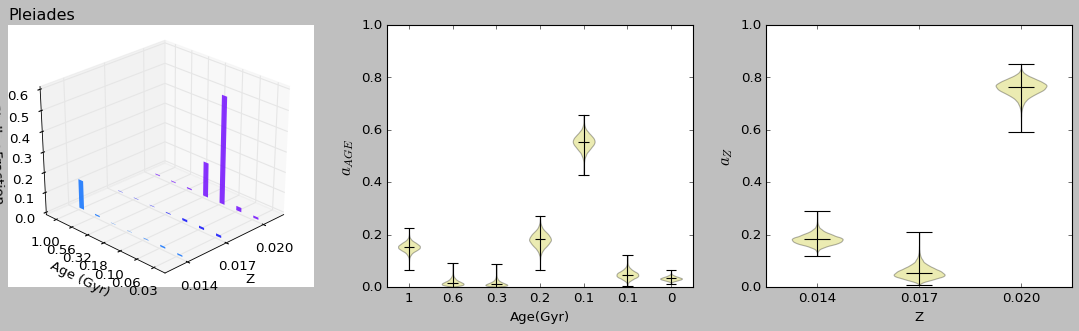

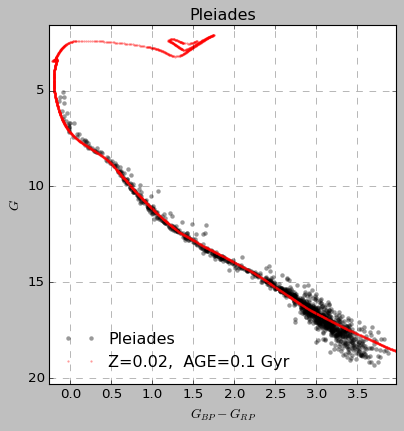

In [4]:
from scipy import genfromtxt, special
import numpy as np
import matplotlib.pyplot as plt
import time
import os, sys
import pystan
import pickle
##
#import SFH_3D_plot_no_scaled as sf3p_ns
#import Marginal_SFH_Bar_NoScale as mgl_b_ns
#path = os.getcwd()

try:
    dt, list_iso, it_title = sys.argv[1], sys.argv[2], sys.argv[3]
    name = dt[:dt.find('.txt')]
except:
    url = 'https://raw.githubusercontent.com/sundarjhu/DAWGI_Lectures_2021/main/Demo_DAWGI_HBM/Pleiades/'
    name = url + 'Pleiades_ruwe_cexcess_SelDist.txt'
    list_iso = url + 'List_Iso21_PARSEC_GaiaEDR3.txt'
    it_title = 'Pleiades'

print('file: ', name)


######################## Integration rutine ########################
def trapz(yt,xt):
    del_x = xt[1:]-xt[:len(xt)-1]
    y2 = 0.5*(yt[1:]+yt[:len(yt)-1])
    return sum(y2*del_x)





##########################################################################################################################
################################################### PDF DEFINITION #######################################################
##########################################################################################################################


######################## Likelihood ########################
def Normal_MGk(gk_dat,gk_err,Iso_sig):                  ## Like apparente magnitude
    sig2 = gk_err*gk_err+Iso_sig*Iso_sig
    return  lambda gk_iso : np.exp( -0.5*(gk_dat-gk_iso)**2 / sig2 ) / np.sqrt(2.*np.pi*sig2)


def Phi_MGk(gkj2, sig_gkj2, gklim, sig_i2):             ## Limit magnitude function.
    b = sig_i2*sig_i2+sig_gkj2*sig_gkj2
    b1 = sig_i2*sig_i2/b
    b2 = sig_gkj2*sig_gkj2/b
    b3 = sig_i2*sig_gkj2/np.sqrt(b)
    return  lambda gk_i2 : special.ndtr( ( gklim - b1*gkj2 - b2*gk_i2 ) / b3 )



########################## Priors #############################
def IMF_Krp(m,ml=0.1,mint=0.5,mu=100.,a1=1.3,a2=2.3):   ##    IMF Kroupa

    h2 = (mu**(1.-a2)-mint**(1.-a2))/(1.-a2)
    h1 = (mint**(1.-a1)-ml**(1.-a1))/(1.-a1)

    c1 = 1./(h1+h2*mint**(a2-a1))
    c2 = c1*mint**(a2-a1)

    c = np.ones(len(m))
    c[np.where(m < mint)] = c1
    c[np.where(m >= mint)] = c2

    a = np.ones(len(m))
    a[np.where(m < mint)] = -a1
    a[np.where(m >= mint)] = -a2
    
    imf = c*m**a
    
    return imf

def IMF_Salp(m, xs=1.35, ml0=0.1, mu0=100.):            ## IMF Salpeter
    cte=-xs/(mu0**(-xs)-ml0**(-xs))
    return cte*m**(-1.-xs) 



############################# Posterior #############################
def P_ij(dat, Ndat, gk1_lim, gk2_lim, gk3_lim, Iso, Niso, sig_i):
    p_ij = []
    for j in range(Ndat):

        P_gk1 = Normal_MGk(dat[2][j],dat[3][j],sig_i)
        P_gk2 = Normal_MGk(dat[4][j],dat[5][j],sig_i)
        P_gk3 = Normal_MGk(dat[6][j],dat[7][j],sig_i)

        Phi_gk1 = Phi_MGk(dat[2][j], dat[3][j], gk1_lim, sig_i)
        Phi_gk2 = Phi_MGk(dat[4][j], dat[5][j], gk2_lim, sig_i)
        Phi_gk3 = Phi_MGk(dat[6][j], dat[7][j], gk3_lim, sig_i)

        pi=[]
        for i in range(Niso):
            Intg = IMF_Krp(Iso[i][0])*P_gk1(Iso[i][1])*P_gk2(Iso[i][2])*P_gk3(Iso[i][3])*Phi_gk1(Iso[i][1])*Phi_gk2(Iso[i][2])*Phi_gk3(Iso[i][3])
            p = trapz(Intg,Iso[i][0])
            pi.append(p)

        p_ij.append(pi)

        if j%200==0:
            print(100.*(float(j)/float(Ndat)),'%')

    p_ij = np.array(p_ij)
    
    return p_ij



################### Normalization constant #####################
def phi(gkk_lim,sig_i4):                                                ## Limit magnitude function.
    return lambda gkk_i4: special.ndtr((gkk_lim-gkk_i4)/sig_i4)

def C_ij(Ndat_c, gk1_lim, gk2_lim, gk3_lim, Iso_c, Niso_c, sig_i):      ## Normalization Constant ##

    phi_gk1c = phi(gk1_lim,sig_i)
    phi_gk2c = phi(gk2_lim,sig_i)
    phi_gk3c = phi(gk3_lim,sig_i)
    
    w=np.array([])
    for i in range(Niso_c):
        intg_c = IMF_Krp(Iso_c[i][0])*phi_gk1c(Iso_c[i][1])*phi_gk2c(Iso_c[i][2])*phi_gk2c(Iso_c[i][3])
        p_c = trapz(intg_c,Iso_c[i][0])
        w = np.append(w,p_c)
    
    return np.array([w for k in range(Ndat_c)])

##########################################################################################################################
##################################################### ISOCRHONES #########################################################
##########################################################################################################################

gk1_lim0 = 20.    ##  27.5  ##   29.
gk2_lim0 = 20.    ##  28.   ##   28.4
gk3_lim0 = 20.

isofilelist = np.genfromtxt(list_iso,dtype='str')

isos0=[]
nn=0
path = url
for k in isofilelist:
    nn+=1
    isos0.append(np.loadtxt(path+k, unpack=True))


N_iso = len(isos0)
print( 'N_iso = ', N_iso )
print( 'N_col = ', len(isos0[0]) )


dismod = 5.667
for j in range(N_iso):
    isos0[j][1]=isos0[j][1]+dismod
    isos0[j][2]=isos0[j][2]+dismod
    isos0[j][3]=isos0[j][3]+dismod

isos = []
for j in range(N_iso):
    f_lim=np.where(isos0[j][1]<=gk1_lim0)
    i_aux = isos0[j].T[f_lim]
    isos.append(i_aux.T)

##########################################################################################################################
#####################################################    DATA    #########################################################
##########################################################################################################################
#    0         1        2      3      4      5       6      7
#   Plx    Plx_error    G    Gerr    GB    GBerr    GR    GRerr
#dat0 = np.loadtxt(dt, unpack = True)
dat0 = np.loadtxt(name, unpack = True)

dat0[2] = dat0[2]-0.11        ## Extinction correction
dat0[4] = dat0[4]-0.14
dat0[6] = dat0[6]-0.083

gk_filter = np.where(dat0[2]<=gk1_lim0)
dat = dat0.T[gk_filter]
dat = dat.T

N_dat = len(dat[0])
print( 'N_dat = ', N_dat )

##########################################################################################################################
################################################### Pij CALCULATION ######################################################
##########################################################################################################################
print( ' ' )

sig_i0 = 0.05

print( 'Calculating Cij ...' )
cc = C_ij(N_dat, gk1_lim0, gk2_lim0, gk3_lim0, isos, N_iso, sig_i0)
print( 'C_ij = ', len(cc), len(cc[0]) )
print( 'Cij end.' )

print( ' ' )

print( 'Calculating Pij ...' )
start = time.time()
pp=P_ij(dat, N_dat, gk1_lim0, gk2_lim0, gk3_lim0, isos, N_iso, sig_i0)
end = time.time()
print( (end - start)/60., 'mins' )
print( 'P_ij = ', len(pp), len(pp[0]) )
print( 'Pij end.' )

print( ' ' )

##########################################################################################################################
################################################# POSTERIOR SAMPLING #####################################################
##########################################################################################################################


############ Stan code ############
code = """

functions{
    real P(int N1, int N2, vector v, matrix M) {
       vector[N1] Mj;
        vector[N1] ln_Mj;

        Mj= M*v;
        for (j in 1:N1){
            if (Mj[j]<=0.)
                Mj[j] = 1.;
        }
        ln_Mj = log(Mj);
        return sum(ln_Mj);
    }
}

data {
    int<lower=0> Nj; // number of data
    int<lower=0> Ni; // number of isochrones
    matrix[Nj,Ni] Pij; // Probability matrix
    matrix[Nj,Ni] Cij; // Normalization matrix
}

parameters {
    simplex[Ni] a;
}

model {
    target += dirichlet_lpdf(a | rep_vector(1., Ni));
    target += P(Nj,Ni,a,Pij);
    target += -1.*P(Nj,Ni,a,Cij);
}

"""

dats = {'Nj' : N_dat,
        'Ni' : N_iso,
        'Pij': pp,
        'Cij': cc  }



############ Running pystan ############
if not os.path.isfile('model.pkl'):
    print( 'model.pkl does not exist' )
    sm = pystan.StanModel(model_code=code)

    print( 'Star sampling' )
    start = time.time()
    fit = sm.sampling(data=dats, iter=1000, chains=50, n_jobs=-1)
    end = time.time()
    print( (end - start), 's' )
    
    sp = fit.extract(permuted=True)

    with open('model.pkl', 'wb') as f:
        pickle.dump(sm, f)

else:
    print( 'model.pkl do exist' )
    sm = pickle.load(open('model.pkl', 'rb'))

    print( 'Star sampling' )
    start = time.time()
    fit = sm.sampling(data=dats, iter=1000, chains=50, n_jobs=-1)
    end = time.time()
    print( (end - start), 's' )
    
    sp = fit.extract(permuted=True)



######### Saving the MCMC sample #########
a_sp = sp['a']

N_iso = len(a_sp[0])
print( 'a_col =', N_iso )

print( 'a_row =', len(a_sp) )

#np.savetxt("ai_sampling_"+name+"_Iso21_sig_i0.05.txt", a_sp, fmt="%.6f", delimiter="  ")





##########################################################################################################################
################################################ PLOTS AND STATISTICS ####################################################
##########################################################################################################################


################# Star formation history (SFH) #################


a_perc = np.array([ np.percentile(ai,[10,50,90]) for ai in a_sp.T])       ##  10th, 50th, 90th percentiles


sfh=[]
#f = open(list_iso, 'r')
#for n,fi in zip(range(N_iso),f):
for n,fi in zip(range(N_iso), isofilelist):
    Zi   = float('0.'+fi[fi.find('Z.')+2:fi.find('_AGE')])
    AGEi = float(fi[fi.find('_AGE')+4:fi.find('Gyr')])
    sfh.append([Zi,AGEi,a_perc[n][0],a_perc[n][1],a_perc[n][2]])

sfh=np.array(sfh)

#hd='       Z       age        p10        p50       p90'
#np.savetxt("SFH_"+name+"_sigIso0.05.txt", sfh, fmt="%.6f", header=hd, delimiter="  ")      ##  Save SFH




#################### SFH plot ####################
fig = plt.figure(1,figsize=(14,4))

#sf3p_ns.sfh_plot_mode(name,sfh.T[0],sfh.T[1],sfh.T[3],'median',fig)    ###  Age-Metalicity relation
sfh_plot_mode(name,sfh.T[0],sfh.T[1],sfh.T[3],'median',fig)    ###  Age-Metalicity relation
plt.title(it_title, loc='left', fontsize='large')
#mgl_b_ns.marg_sfh_bar_age(name,sfh.T,a_sp,fig)                         ###  SFH
#mgl_b_ns.marg_sfh_bar_Z(name,sfh.T,a_sp,N_iso,fig)                     ###  Metal distribution
marg_sfh_bar_age(name,sfh.T,a_sp,fig)                         ###  SFH
marg_sfh_bar_Z(name,sfh.T,a_sp,N_iso,fig)                     ###  Metal distribution

plt.subplots_adjust(left=0.03, bottom=0.12, right=0.98, top=0.94, wspace=0.24, hspace=0.20)
#plt.savefig('SFH_'+name+'_'+str(sig_i0)+'.png')
#plt.close(1)
plt.show()



###########  Color-magnitude diagram  ############

#### Isocrone ####
idn_max = np.argmax(sfh[:,3])   ## Maximum p50 - iscocrone contribution

Z_max = sfh[:,0][idn_max]
AGE_max = sfh[:,1][idn_max]

lgn="Z="+str(Z_max)+",  AGE="+str(AGE_max)+" Gyr"   ## Isocrone legend

Iso_max = isos[idn_max]
col_iso, mag_iso = Iso_max[2]-Iso_max[3], Iso_max[1]   ## Colour and magnitudes


###### Data ######
col_dat = dat0[4]-dat0[6]
mag_dat = dat0[2]


##################

plt.figure(2,figsize=(5.6,5.6))

plt.plot(col_dat, mag_dat, 'ko', markersize=4, markeredgewidth=0., alpha=0.4, label = it_title)   ## Data CMD
plt.plot(col_iso, mag_iso,'ro', markersize=2, markeredgewidth=0., alpha=0.4, label = lgn)         ## Iso CMD

sz=15
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$G$')

min_x ,min_y = min(np.min(col_dat),np.min(col_iso)), min(np.min(mag_dat),np.min(mag_iso))
max_x ,max_y = max(np.max(col_dat),np.max(col_iso)), max(np.max(mag_dat),np.max(mag_iso))

plt.xlim(min_x+0.2,max_x-0.2)
plt.ylim(max_y+0.5,min_y-0.5)
plt.grid(linestyle='--', alpha=0.5)
plt.title(it_title)
plt.legend(frameon=False, loc=0)
#plt.savefig('CMD_'+it_title+'.png')
plt.show()